In [ ]:
# Mounting the Drive, in order to get the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from termcolor import colored

In [ ]:
# Reading the preprocessed data
data = pd.read_csv('/content/drive/MyDrive/deviants_pg5/complted data/preprocessed_data/new_data.csv')
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,keywords,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,avatar future marine native paraplegic,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,goddess marriage ceremony marriage proposal pi...,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,bomb espionage sequel spy terrorist,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,deception imprisonment lawlessness police offi...,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action Adventure Sci-Fi,john carter,alien american civil war male nipple mars prin...,Daryl Sabara Samantha Morton Polly Walker Andr...


## Getting the Vectorized form of the text in comb column that is present in the preprocessed data

The comb column is the basis of our recommendation of movies. The column composes of Movie Stars, Director, genres, and also the keywords that describes the plot of the movie. We convert the text into vectors using TfIdf (Term frequency - Inverse document frequency) transformation.

Now what is **term frequency** ,it is the **relative frequency of a word in a document** and is given as *(term instances/total instances)*. **Inverse Document Frequency** is the **relative count of documents containing the term ** is given as *log(number of documents/documents with term)*. The overall importance of each word to the documents in which they appear is equal to TF * IDF.

This will give you a **matrix where each column represents a word in the overview vocabulary** (all the words that appear in at least one document) and **each row represents a movie**, as before.This is done to reduce the importance of words that occur frequently in plot keywords and therefore, their significance in computing the final similarity score.

In [ ]:
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data['comb'])


##Computing the Cosine Similarity Matrix to find the closest movies to the movies. 
Each **ith Vector in the matrix** is the **collection of all the values that imply how close the jth movie is to the ith movie**. We use this later to **find 10 largest values, other than the movie itself** to depict the recommended movies that are close to the given movie(Based on the factors).

In [ ]:
similarity = cosine_similarity(vector)
print("similarity:",similarity)

similarity: [[1.         0.0327055  0.021148   ... 0.01375698 0.0095136  0.        ]
 [0.0327055  1.         0.01943422 ... 0.01264215 0.00874265 0.        ]
 [0.021148   0.01943422 1.         ... 0.         0.05767289 0.00748532]
 ...
 [0.01375698 0.01264215 0.         ... 1.         0.00561601 0.        ]
 [0.0095136  0.00874265 0.05767289 ... 0.00561601 1.         0.01081919]
 [0.         0.         0.00748532 ... 0.         0.01081919 1.        ]]


In [ ]:
m=input("Enter the movie:").lower()

Enter the movie:liar liar


In [ ]:
#We try to fetch the movie based on the name and get   the index, if the name does not exist, the console gets exited.

try:
  i = data.loc[data['movie_title']==m].index[0]
except:
  print(colored("Sorry Your movie doesn't exist in our database",'red'))
  exit()

In [ ]:
#We later fetch the movie similarity vector/array from the similarities using the index, i. We enumerate it, to keep the indexes of the movies that caught ouuuur attention.
#Once, we get the enumerated values, we sort them based on the similarity score in descending order.

lst = list(enumerate(similarity[i]))
lst = sorted(lst, key = lambda x:x[1] ,reverse=True)

In [ ]:
# We pick the values from 1 to 11, note that zero index has the respective movie itself.

lst = lst[1:11]
l = []
lst


[(2731, 0.279506731479844),
 (4075, 0.1885346724772953),
 (3030, 0.1775622141719012),
 (2594, 0.17250754454554246),
 (4454, 0.1666197401032055),
 (3502, 0.1606530677978508),
 (1826, 0.15659743920585784),
 (1334, 0.15123618560475302),
 (989, 0.14889992829711984),
 (620, 0.14673430387947964)]

In [ ]:
#Once, we get the top 10 movies, we append the names into an empty list.

for i in range(len(lst)):
    a = lst[i][0]
    l.append(data['movie_title'][a])

In [ ]:
print(colored('\t\t\t\t\t\t\tThe top 10 recommended movies based on your search are','blue'))
for movie in l:
  print(colored(f'\t\t\t\t\t\t\t\t\t{movie.title()}','green'))

							The top 10 recommended movies based on your search are
									The Golden Child
									Sublime
									Motherhood
									Dangerous Liaisons
									Quinceañera
									The Haunting Of Molly Hartley
									Bright Lights, Big City
									This Is 40
									Insomnia
									Primary Colors


##Once, we have got the recommendations, let's compare how the  values are associated in the **similarity matrix** with the help of plotting the **line graph** with **cosine similarity vs movies** .

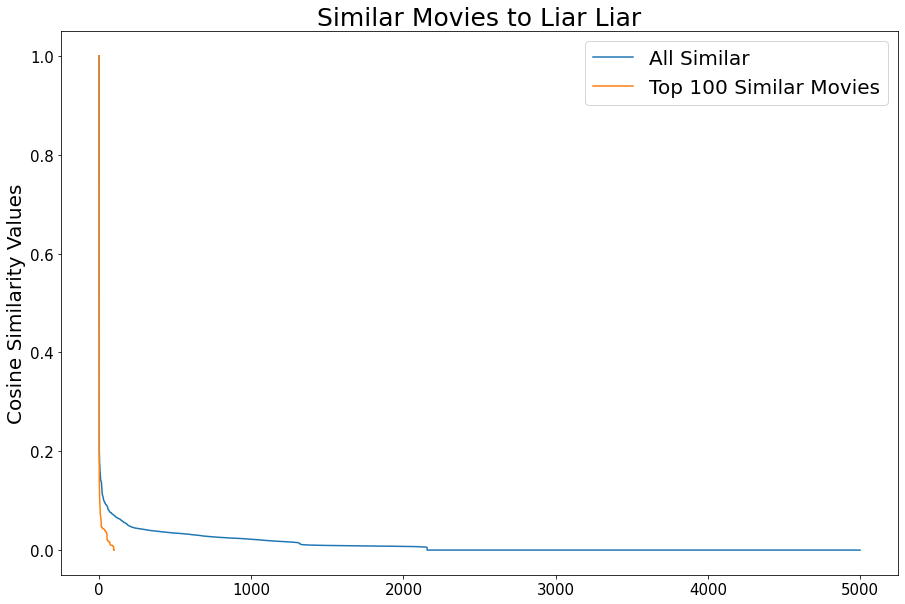

In [ ]:
import matplotlib.pyplot  as plt
plt.figure(figsize = (15,10))
plt.plot(sorted(similarity[i],reverse = True), label = "All Similar")
plt.plot(sorted(similarity[i][0:100],reverse = True), label = "Top 100 Similar Movies")
plt.title(f"Similar Movies to {m.title()}", fontsize = 25)
plt.ylabel("Cosine Similarity Values", fontsize = 20)
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 20)
plt.show()